In [140]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import tensorflow as tf
import random
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [141]:
_URL = "https://firebasestorage.googleapis.com/v0/b/ds620-group-project.appspot.com/o/good_bad_weather_filter.zip?alt=media&token=2acd663c-1085-4c8b-8d3d-2438890d7aba"
path_to_zip = tf.keras.utils.get_file('good_bad_weather_file.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'good_bad_weather_filter')

dir = os.path.join(PATH)


In [142]:
categories = ['good', 'bad']
data = []

for category in categories:
  path = os.path.join(dir, category)
  label = categories.index(category)

  for img in os.listdir(path):
    imgpath = os.path.join(path, img)
    weather_img = cv2.imread(imgpath, 1)
    try:
      weather_img = cv2.resize(weather_img,(50,50))
      image = np.array(weather_img).flatten()
      data.append([image, label])
    except Exception as e:
      pass

print(len(data))

399


In [153]:
random.shuffle(data)
features = []
labels = []

for feature, label in data:
  features.append(feature)
  labels.append(label)

In [154]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

model = SVC(C=1, kernel='poly', gamma='auto')
model.fit(x_train, y_train)

SVC(C=1, gamma='auto', kernel='poly')

Accuracy 79.16666666666666%
Prediction is good weather


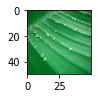

Prediction is good weather


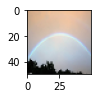

Prediction is bad weather


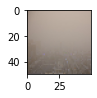

Prediction is good weather


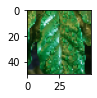

Prediction is bad weather


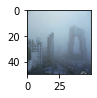

Prediction is bad weather


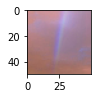

Prediction is bad weather


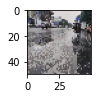

Prediction is good weather


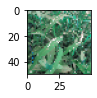

Prediction is bad weather


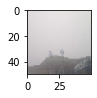

In [155]:
# Prediction

y_predict = model.predict(x_test)

accuracy = accuracy_score(y_test, y_predict) * 100

print("Accuracy {}%".format(accuracy))

for i in range(9):

  ax = plt.subplot(3, 3, i + 1)
  print("Prediction is {} weather".format(categories[y_predict[i]]))
  weather = x_test[i].reshape(50,50, -1)
  plt.imshow(weather)
  plt.show()